# Práctico: Recomendación de Artistas

En este práctico trabajaremos con el conjuto de datos de [LastFM](https://grouplens.org/datasets/hetrec-2011/) para el desarrollo de un sistema de recomendación que, dado el nombre de un artista musical, devuelve una lista de artistas "similares".

Para el práctico utilizaremos el conjunto de datos de LastFM que consiguieron del [notebook de instalación](./instalacion.ipynb). Se recomienda leer el [Readme](http://files.grouplens.org/datasets/hetrec2011/hetrec2011-lastfm-readme.txt) de los datos para saber más sobre que información contiene cada archivo.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [29]:
artists = pd.read_csv(r'C:\Users\Usuario\Desktop\SistemasDeRecomendacion-master/artists.dat', sep="\t")

artists = artists[['id', 'name']]


artists.head()


,id,name
0,1,MALICE MIZER
1,2,Diary of Dreams
2,3,Carpathian Forest
3,4,Moi dix Mois
4,5,Bella Morte


In [3]:
user_artist_plays = pd.read_csv(r"C:\Users\Usuario\Desktop\SistemasDeRecomendacion-master/user_artists.dat", sep="\t")
user_artist_plays.head()

,userID,artistID,weight
0,2,51,13883
1,2,52,11690
2,2,53,11351
3,2,54,10300
4,2,55,8983


In [46]:
df_artistas = user_artist_plays.merge(artists, left_on = 'artistID', right_on = 'id' )

In [47]:
df_artistas = df_artistas[['userID', 'artistID', 'name', 'weight']]

In [48]:
df_artistas[df_artistas['userID'] == 2].head()

,userID,artistID,name,weight
0,2,51,Duran Duran,13883
111,2,52,Morcheeba,11690
134,2,53,Air,11351
209,2,54,Hooverphonic,10300
227,2,55,Kylie Minogue,8983


In [4]:
user_artist_plays['weight'].isnull().sum()

0

In [5]:
tags=pd.read_csv(r"C:\Users\Usuario\Desktop\SistemasDeRecomendacion-master/tags.dat", sep='\t', engine='python')
tags

,tagID,tagValue
0,1,metal
1,2,alternative metal
2,3,goth rock
3,4,black metal
4,5,death metal
...,...,...
11941,12644,suomi
11942,12645,symbiosis
11943,12646,sverige
11944,12647,eire


In [6]:
user_friends=pd.read_csv(r"C:\Users\Usuario\Desktop\SistemasDeRecomendacion-master/user_friends.dat", sep='\t')
user_friends.head()

,userID,friendID
0,2,275
1,2,428
2,2,515
3,2,761
4,2,831


In [7]:
user_taggedartists=pd.read_csv(r"C:\Users\Usuario\Desktop\SistemasDeRecomendacion-master/user_taggedartists.dat", sep='\t')
user_taggedartists.head()

,userID,artistID,tagID,day,month,year
0,2,52,13,1,4,2009
1,2,52,15,1,4,2009
2,2,52,18,1,4,2009
3,2,52,21,1,4,2009
4,2,52,41,1,4,2009


In [82]:
user_taggedartists.dtypes

userID      int64
artistID    int64
tagID       int64
day         int64
month       int64
year        int64
dtype: object

In [104]:
tags = user_taggedartists.groupby('artistID')['tagID'].mean().round(decimals = 0)

In [105]:
tags = pd.DataFrame(tags)
tags.reset_index()


,artistID,tagID
0,1,479.0
1,2,640.0
2,3,2960.0
3,4,966.0
4,5,543.0
...,...,...
12518,18737,804.0
12519,18739,118.0
12520,18740,74.0
12521,18741,5947.0


In [106]:
tags.columns = [['artistID', 'tagID']]

ValueError: Length mismatch: Expected axis has 1 elements, new values have 2 elements

## Actividades

El [Ejercicio 1](#Ejercicio-1---Análisis-Exploratorio-de-Datos) deberá ser realizado por quienes estén realizando cualquier parte de la materia.

El [Ejercicio 2](#Ejercicio-2---Sistema-de-Recomendación) variará de acuerdo a que parte de la materia estén realizando, quienes estén realizando la materia completa, deberán realizar ambas partes.

De acuerdo a la parte de la materia que hagan, deberán realizar una de las siguientes actividades (pueden realizar ambas si así lo desean):

La idea del práctico es hacer un análisis muy sencillo del conjunto de datos y desarrollar dos sistemas de recomendación: 
1. El primero, más sencillo, utilizando [Surpr!se](http://surpriselib.com/), y a partir de los datos de LastFM, en especial del archivo `./data/lastfm/user_artists.dat`, generar un sistema de recomendación basado en filtros colaborativos.
2. En el segundo, deberán utilizar todos los datos ofrecidos en el dataset de LastFM para generar un sistema de filtrado colaborativo más complejo, deberá utilizar las técnicas aprendidas 

basado en filtrado colaborativo (usando Surpr!se), a partir de los datos existentes.

## Ejercicio 1 - Análisis Exploratorio de Datos

En esta primera parte deberán hacer un análisis exploratorio de los datos, aprovechando toda la información brindada por el conjunto. A partir de eso podrán tener mayor idea de qué tipo de datos estarán enfrentando (describe o hist).

Algunas preguntas para responder:
- ¿Cuáles son los artistas que fueron más escuchados?
- ¿Cómo es la distribución de cantidad de listens por user?
- ¿Es posible ver el género más escuchado?

#### Artista más escuchado:

In [38]:
n_artists=df_artistas['name'].nunique()
n_users=df_artistas['userID'].nunique()

print(f"Number of unique Bandas: {n_artists}")
print(f"Number of unique users: {n_users}")


Number of unique Bandas: 17632
Number of unique users: 1892


In [108]:
mean_ratings = df_artistas.groupby('name')[['weight']].mean()
lowest_rated = mean_ratings['weight'].idxmax()


print(df_artistas[df_artistas['name'] == lowest_rated])

       userID  artistID          name  weight
79753     596      8388  Viking Quest   35323


- El artista más escuchado es Viking Quest.

#### Distribución de Listens per User puede verse más adelante.

#### Género más escuchado:

## Ejercicio 2 - Sistema de Recomendación

### Ejercicio 2a - Filtrados Colaborativos

Esta parte del ejercicio es obligatoria para aprobar la parte introductoria de la materia (i.e. los contenidos que se ven en las dos primeras clases), quienes estén realizando la materia completa deerán realizar también el [Ejercicio 2b](#Ejercicio-2b---Sistemas-de-Recomendación-Avanzados). 

Deberán realizar un sistema de filtrados colaborativos basado en [Surpr!se](http://surpriselib.com/), a partir de los datos que proporciona `LastFM`, en especial el archivo `user_artists.dat`. Tener en cuenta los siguientes pasos:

1. **Desarrollo de la matriz de Usuario-Contenido:** A partir del conjunto de datos deberán generar una matriz de usuario-contenido. Tener en cuenta que los ratings son implícitos, puesto que se dan a partir de la cantidad de veces que un usuario escuchó a determinado artista.
2. **Entrenamiento del algoritmo de recomendación**: Utilizando las herramientas brindadas por [Surpr!se](http://surpriselib.com/), entrenen varios modelos (al menos 3) de sistemas de recomendación basados en filtrado colaborativo a partir de su matriz de usuario-contenido. Recuerden tener en cuenta lo aprendido en la diplomatura a la hora de evaluar y validar el modelo. Si necesitan inspiración, les recomendamos revisar [este notebook con información de como entrenar un sistema de recomendación con Surpr!se](https://github.com/susanli2016/Machine-Learning-with-Python/blob/master/Building%20Recommender%20System%20with%20Surprise.ipynb).
3. **Sistema de recomendación**: A partir del mejor modelo de recomendación que haya surgido del caso anterior, y utilizando los datos del archivo `artist.dat`, armar un sistema de recomendación sencillo que, dado un nombre de un artista, devuelva el top 10 de artistas más similares. La idea es que el sistema tome el nombre de un artista y devuelva el nombre de otros artistas (no simplemente tomar y devolver IDs). Se recomienda [revisar este notebook para inspiración (ver el paso número 5)](https://github.com/topspinj/pydata-workshop/blob/master/tutorial.ipynb).

In [8]:
from surprise import Dataset, Reader, KNNWithMeans
from surprise.accuracy import rmse
from surprise.model_selection import cross_validate, train_test_split
from sklearn.preprocessing import MinMaxScaler

#### 1 - Desarrollo matriz usuario contenido.

In [49]:

from scipy.sparse import csr_matrix

def create_X(df):
    """
    Generates a sparse matrix from ratings dataframe.
    
    Args:
        df: pandas dataframe containing 3 columns (userId, artistId, weight)
    
    Returns:
        X: sparse matrix
        user_mapper: dict that maps user id's to user indices
        user_inv_mapper: dict that maps user indices to user id's
        movie_mapper: dict that maps movie id's to movie indices
        movie_inv_mapper: dict that maps movie indices to movie id's
    """
    M = df_artistas['userID'].nunique()
    N = df_artistas['artistID'].nunique()

    user_mapper = dict(zip(np.unique(df_artistas['userID']), list(range(M))))
    artist_mapper = dict(zip(np.unique(df_artistas['artistID']), list(range(N))))
    
    user_inv_mapper = dict(zip(list(range(M)), np.unique(user_artist_plays['userID'])))
    artist_inv_mapper = dict(zip(list(range(N)), np.unique(df_artistas['artistID'])))
    
    user_index = [user_mapper[i] for i in df_artistas['userID']]
    item_index = [artist_mapper[i] for i in df_artistas['artistID']]

    X = csr_matrix((df_artistas["weight"], (user_index,item_index)), shape=(M,N))
    
    return X, user_mapper, artist_mapper, user_inv_mapper, artist_inv_mapper

X, user_mapper, artist_mapper, user_inv_mapper, artist_inv_mapper = create_X(df_artistas)

## Sparsity

Proporcion de celdas vacías en la matríz usuario contenido.

In [50]:
n_total = X.shape[0]*X.shape[1]
n_ratings = X.nnz
sparsity = n_ratings/n_total
print(f"Matrix sparsity: {round(sparsity*100,2)}%")

Matrix sparsity: 0.28%


### Cold start problem

Definición tomada del notebook de referencia.

"The cold start problem is when there are new users and movies in our matrix that do not have any ratings. In our Movielens dataset, all users and movies have at least one rating but in general, it's useful to check which users and movies have few interactions."

In [51]:
n_ratings_per_user = X.getnnz(axis=1)

print(f"Most active user rated {n_ratings_per_user.max()} artists.")
print(f"Least active user rated {n_ratings_per_user.min()} artists.")

Most active user rated 50 artists.
Least active user rated 1 artists.


In [52]:

n_ratings_per_artist = X.getnnz(axis=0)

print(f"Most rated artist has {n_ratings_per_artist.max()} ratings.")
print(f"Least rated artist has {n_ratings_per_artist.min()} ratings.")

Most rated artist has 611 ratings.
Least rated artist has 1 ratings.


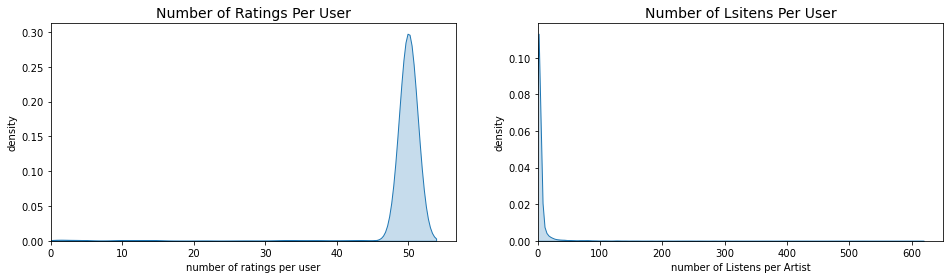

In [109]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.kdeplot(n_ratings_per_user, shade=True)
plt.xlim(0)
plt.title("Number of Ratings Per User", fontsize=14)
plt.xlabel("number of ratings per user")
plt.ylabel("density")
plt.subplot(1,2,2)
sns.kdeplot(n_ratings_per_artist, shade=True)
plt.xlim(0)
plt.title("Number of Lsitens Per User", fontsize=14)
plt.xlabel("number of Listens per Artist")
plt.ylabel("density")
plt.show()

In [55]:
sum_ratings_per_artist = X.sum(axis=0)
mean_rating_per_artist = sum_ratings_per_artist/n_ratings_per_artist

In [56]:
X_mean_artist = np.tile(mean_rating_per_artist, (X.shape[0],1))


In [57]:
X_mean_artist.shape


(1892, 17632)

In [58]:
X_norm = X - csr_matrix(X_mean_artist)


In [59]:
print("Original X:", X[0].todense())
print("Normalized X:", X_norm[0].todense())

Original X: [[0 0 0 ... 0 0 0]]
Normalized X: [[-257.         -667.66666667 -258.33333333 ... -287.
  -286.         -426.        ]]


## Recomendador basado en KNN

In [64]:
from sklearn.neighbors import NearestNeighbors

def find_similar_artist(artist_id, X, artist_mapper, artist_inv_mapper, k, metric='cosine'):
    """
    Finds k-nearest neighbours for a given artist id.
    
    Args:
        artist_id: id of the artist of interest
        X: user-item utility matrix
        k: number of similar movies to retrieve
        metric: distance metric for kNN calculations
    
    Output: returns list of k similar artists ID's
    """
    X = X.T
    neighbour_ids = []
    
    artist_ind = artist_mapper[artist_id]
    artist_vec = X[artist_ind]
    if isinstance(artist_vec, (np.ndarray)):
        artist_vec = artist_vec.reshape(1,-1)
    # use k+1 since kNN output includes the movieId of interest
    kNN = NearestNeighbors(n_neighbors=k+1, algorithm="brute", metric=metric)
    kNN.fit(X)
    neighbour = kNN.kneighbors(artist_vec, return_distance=False)
    for i in range(0,k):
        n = neighbour.item(i)
        neighbour_ids.append(artist_inv_mapper[n])
    neighbour_ids.pop(0)
    return neighbour_ids

- Artistas similares:

In [65]:
similar_artists = find_similar_artist(1, X_norm, artist_mapper, artist_inv_mapper, k=10)
similar_artists

[5077, 5085, 5086, 5090, 5091, 5092, 5095, 5096, 5078]

In [107]:
artist_titles = dict(zip(df_artistas['artistID'], df_artistas['name']))

artist_id = 1

similar_artist = find_similar_artist(artist_id, X_norm, artist_mapper, artist_inv_mapper, metric='cosine', k=10)
artist_title = artist_titles[artist_id]

print(f"Because you listened {artist_title}:")
for i in similar_artist:
    print(artist_titles[i])

Because you listened MALICE MIZER:
hide
Cristina D'Avena
YOSHIKI
hitomi
SADS
883
ポルノグラフィティ
DJ OZMA
ZARD


### Entrenamiento de diversos Modelos

In [27]:
user_artist_plays.weight.describe()

count     92834.00000
mean        745.24393
std        3751.32208
min           1.00000
25%         107.00000
50%         260.00000
75%         614.00000
max      352698.00000
Name: weight, dtype: float64

In [28]:
user_artist_plays['weight_scaled']=(user_artist_plays['weight']-user_artist_plays['weight'].mean()) /user_artist_plays['weight'].std()
user_artist_plays.head()

,userID,artistID,weight,weight_scaled
0,2,51,13883,3.502167
1,2,52,11690,2.917573
2,2,53,11351,2.827205
3,2,54,10300,2.547037
4,2,55,8983,2.195961


In [29]:
reader=Reader(rating_scale=(user_artist_plays.weight_scaled.min(), user_artist_plays.weight_scaled.max()))
df_user=Dataset.load_from_df(user_artist_plays[['userID', 'artistID', 'weight_scaled']], reader)

## KNN

In [39]:
df_user_train, df_user_test = train_test_split(df_user, test_size=0.2)
model = KNNWithMeans(k=5).fit(df_user_train)
predictions = model.test(df_user_test)
print("RMSE on test: {:.4f}".format(rmse(predictions, verbose=False)))

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE on test: 1.0469


In [40]:
model = KNNWithMeans(k=5, verbose=False)
cross_validated_metrics = cross_validate(model, df_user, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.1310  0.9878  1.2572  0.9290  1.0450  1.0700  0.1149  
MAE (testset)     0.2062  0.2190  0.2196  0.2138  0.2197  0.2157  0.0052  
Fit time          0.49    0.53    0.52    0.52    0.53    0.52    0.01    
Test time         1.15    1.14    1.15    1.17    1.26    1.18    0.04    


## SVD

In [42]:
from surprise import SVD, accuracy

algo = SVD()
algo.fit(df_user_train)

In [45]:
predictions = algo.test(df_user_test)
accuracy.rmse(predictions)

RMSE: 0.9856


0.9856239408104711

In [46]:
cross_validate(algo, df_user, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.6810  0.9194  0.8192  1.1295  1.2987  0.9696  0.2201  
MAE (testset)     0.1991  0.2082  0.2008  0.2133  0.2131  0.2069  0.0060  
Fit time          4.15    4.16    4.09    4.07    4.06    4.11    0.04    
Test time         0.23    0.12    0.24    0.12    0.11    0.16    0.06    


{'test_rmse': array([0.68103989, 0.91944795, 0.81917048, 1.12951835, 1.29865289]),
 'test_mae': array([0.19913221, 0.20821743, 0.20084612, 0.21326016, 0.2130825 ]),
 'fit_time': (4.151439428329468,
  4.161123037338257,
  4.094226837158203,
  4.0713536739349365,
  4.057428598403931),
 'test_time': (0.22875738143920898,
  0.11538243293762207,
  0.23577189445495605,
  0.11638450622558594,
  0.11438751220703125)}

In [48]:
from surprise import SVDpp, SlopeOne, NMF, NormalPredictor, KNNBaseline, KNNBasic, KNNWithMeans, KNNWithZScore, BaselineOnly, CoClustering

In [49]:
benchmark = []
# Iterate over all algorithms
for algorithm in [SVD(), SVDpp(), SlopeOne(), NMF(), NormalPredictor(), KNNBaseline(), KNNBasic(), KNNWithMeans(), KNNWithZScore(), BaselineOnly(), CoClustering()]:
    # Perform cross validation
    results = cross_validate(algorithm, df_user, measures=['RMSE', 'MAE'], cv=3, verbose=False)
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)
    
pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')    


Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...


,test_rmse,test_mae,fit_time,test_time
Algorithm,,,,
BaselineOnly,0.973058,0.188159,0.162202,0.203342
KNNWithMeans,0.974332,0.208742,0.401989,2.657094
SVD,0.982635,0.207017,3.383523,0.233778
KNNBaseline,0.983421,0.189405,0.516371,3.099269
SlopeOne,0.989074,0.201920,3.796306,0.907334
SVDpp,0.989734,0.200246,28.745339,1.441103
KNNBasic,1.000563,0.212386,0.362863,2.413989
KNNWithZScore,1.058030,0.202636,0.490952,2.911642
NormalPredictor,1.225096,0.551726,0.105011,0.255515


### Ejercicio 2b - Sistemas de Recomendación Avanzados

Este ejercicio lo deberán completar quienes hayan realizado ambas partes de la materia pues requiere de los conocimientos adquiridos en las segundas dos clases. En este caso, utilizarán no sólo la información de la matriz de usuario-contenido, sino que deberán hacer uso de otra información para poder lidiar con el problema del "Cold Start", i.e. que es lo que ocurre cuando tengo nuevos usuarios o artistas. Tener en cuenta los siguientes pasos:
1. **Evaluación sobre cold start**: Para evaluar como funciona el sistema con el problema del "cold start", deberán tomar ciertos artistas y "dejarlos fuera", i.e. remover cualquier participación del artista en el sistema. Esos serán los artistas que se evaluarán como "cold start".
2. **Vectores de contenido**: Deberán generar vectores de contenido para los artistas, basados en los tags que los usuarios les dan (ver los archivos `user_taggedartists.dat` y `tags.dat`).
3. **Sistema de recomendación**: Deberán crear un sistema de recomendación que tomará como parámetros la información del artista (i.e. nombre y tags). Con dicha información, deberán disponer de un sistema de recomendación híbrido (utilizando cualquiera de las técnicas vistas en clase) que devuelva artistas similares. El sistema de recomendación deberá utilizar toda la información proporcionada para dar una mejor respuesta.
4. **Evaluación del sistema**: Deberán evaluar "a mano" el sistema sobre artistas que conozca y artistas que no conozca (i.e. que fueron dejados afuera), y hacer un análisis de lo que el sistema está devolviendo.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

class GenresBasedFilter(object):
    def __init__(self, movies, k=5):
        self.movie_to_idx = {row["movieId"]: idx for idx, row in movies.iterrows()}
        self.idx_to_movie = {idx: movie for movie, idx in self.movie_to_idx.items()}
        self.k = k

        genres = set(g for G in movies['genres'] for g in G)
        for g in genres:
            movies[g] = movies.genres.transform(lambda x: int(g in x))

        self.movie_genres = movies.drop(columns=['movieId', 'title', 'genres'])

    def fit(self, ratings):
        self.movies_cosine_sim_ = cosine_similarity(self.movie_genres, self.movie_genres)

        self.user_ratings_ = {}
        for (user_id, movie_id, rating) in ratings.build_testset():
            if user_id not in self.user_ratings_:
                self.user_ratings_[user_id] = {}
            self.user_ratings_[user_id][movie_id] = rating

        return self

    def predict(self, user, movie):
        if not user in self.user_ratings_ or not movie in self.movie_to_idx:
            global_mean = np.mean([
                rating for movies in self.user_ratings_.values() for rating in movies.values()
            ])
            return global_mean

        movie_idx = self.movie_to_idx[movie]
        sim_scores = list(enumerate(self.movies_cosine_sim_[movie_idx]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        sim_scores = sim_scores[1:]

        sims = []

        for movie, score in sim_scores:
            if self.idx_to_movie[movie] in self.user_ratings_[user]:
                sims.append((self.user_ratings_[user][self.idx_to_movie[movie]], score))
                if len(sims) >= self.k:
                    break

        user_mean = np.mean(list(self.user_ratings_[user].values()))

        pred = 0
        sim_sum = 0

        for rating, score in sims:
            pred += score * (rating - user_mean)
            sim_sum += score

        if sim_sum == 0:
            return user_mean

        return user_mean + pred / sim_sum3

In [ ]:
# Completar...